In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


sns.set_style('darkgrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
pd.set_option('display.max_rows',2000)

%run ../shared_datasets/charlie_functions.py
%run ../shared_datasets/clean_dataframe.py

In [2]:
raw_data = pd.read_csv('/Users/schlinkertc/Flatiron/projects/mod4_project/developer_survey_2019/survey_results_public.csv')

dataframe_class = CleanDataframe(raw_data)
df = dataframe_class.cleaned_df

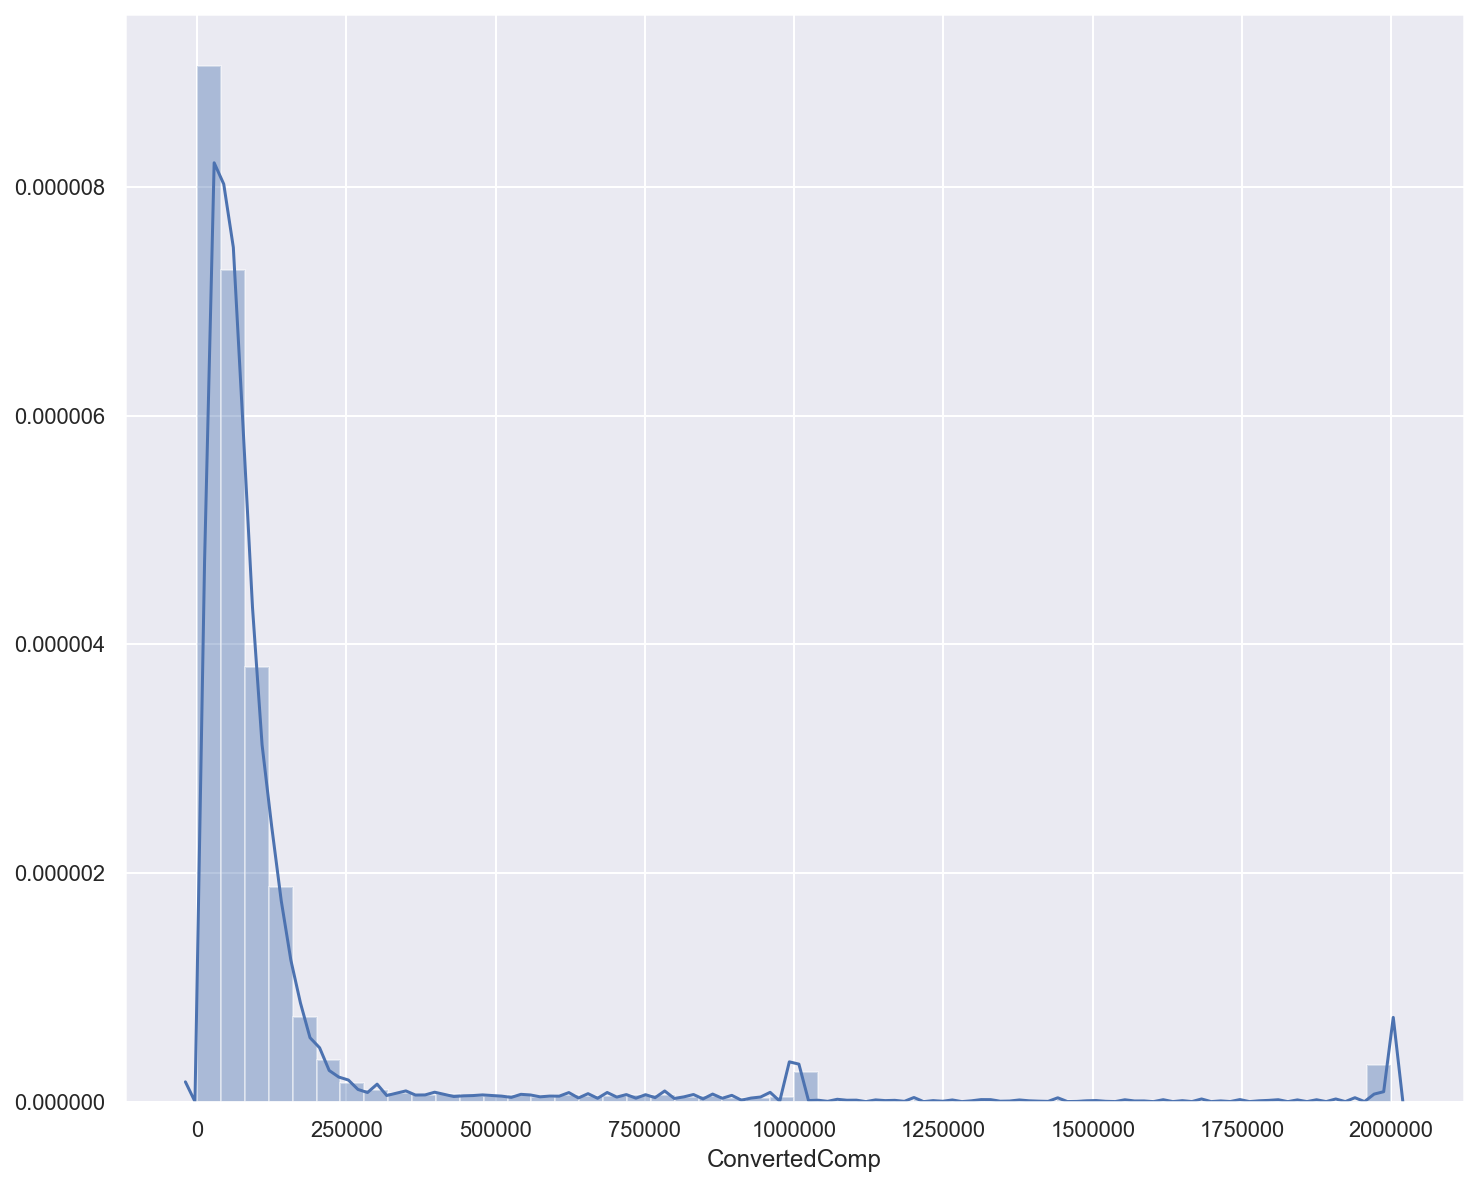

In [3]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})

sns.distplot(raw_data['ConvertedComp'].dropna())

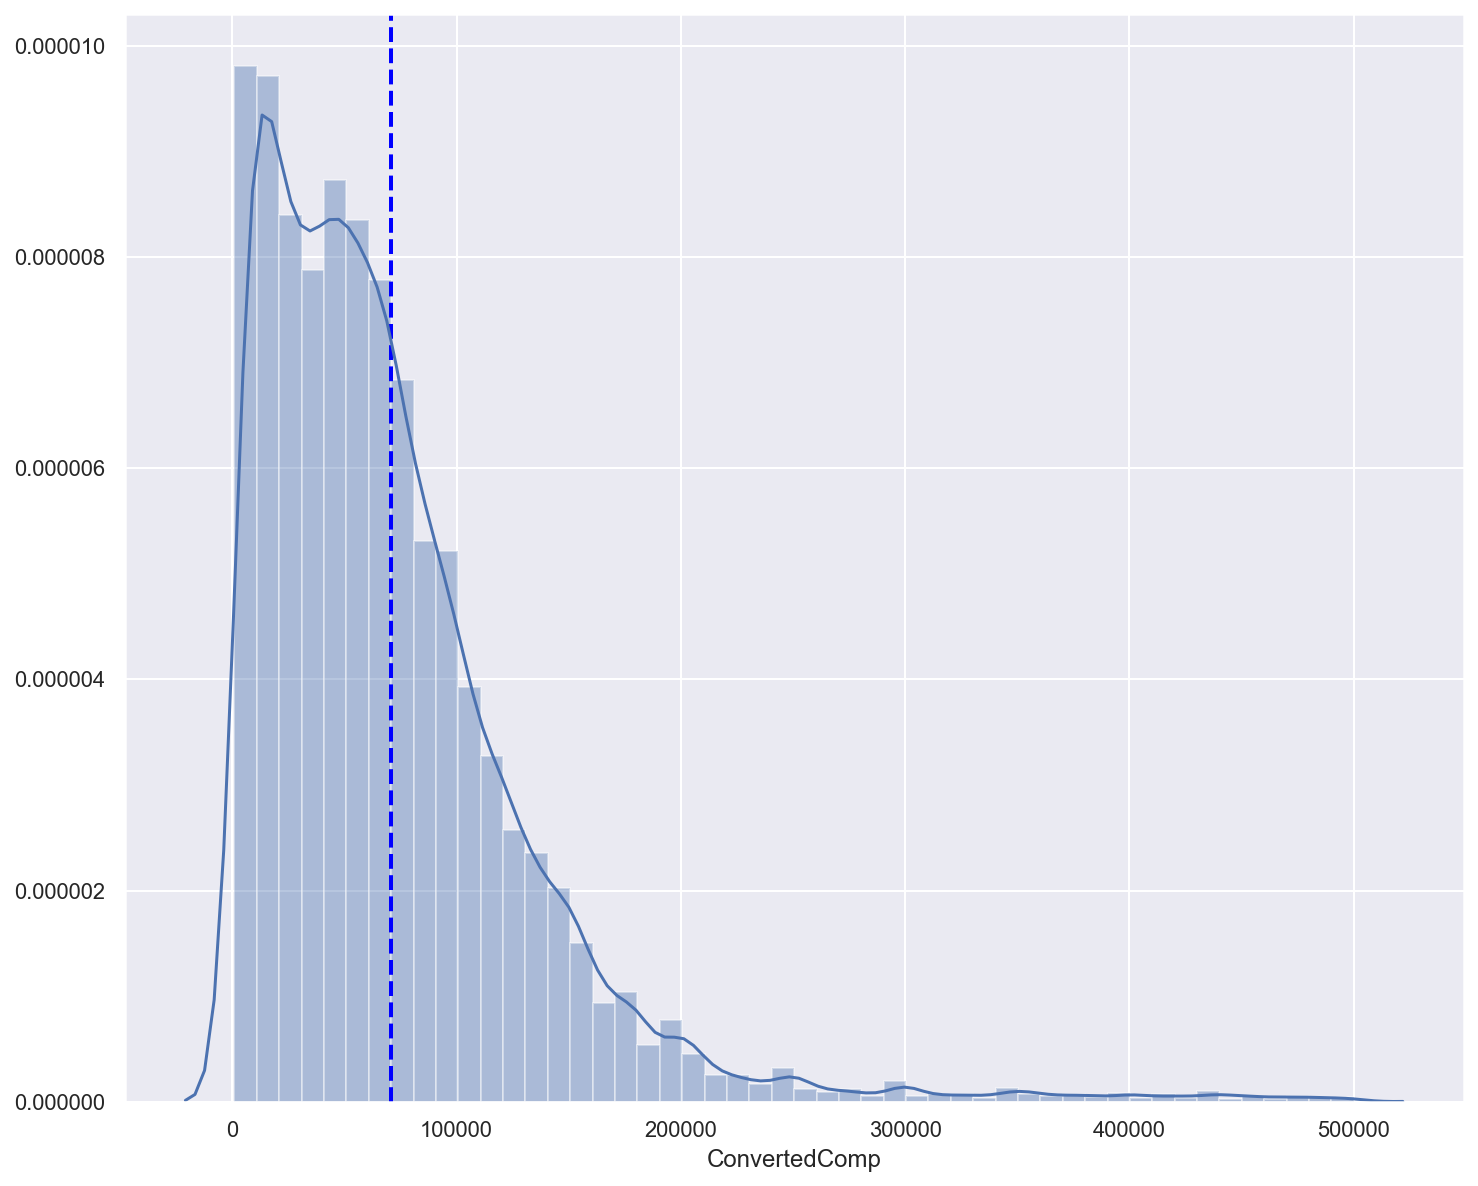

In [4]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
plt.axvline(df['ConvertedComp'].mean(),color='blue', linestyle='--', lw=2)

sns.distplot(df['ConvertedComp'])

In [18]:
temp = df[(df['ConvertedComp']>10000) & (df['ConvertedComp']<250000)]
temp2 = df[(df['ConvertedComp']>200000) & (df['ConvertedComp']<500000)]

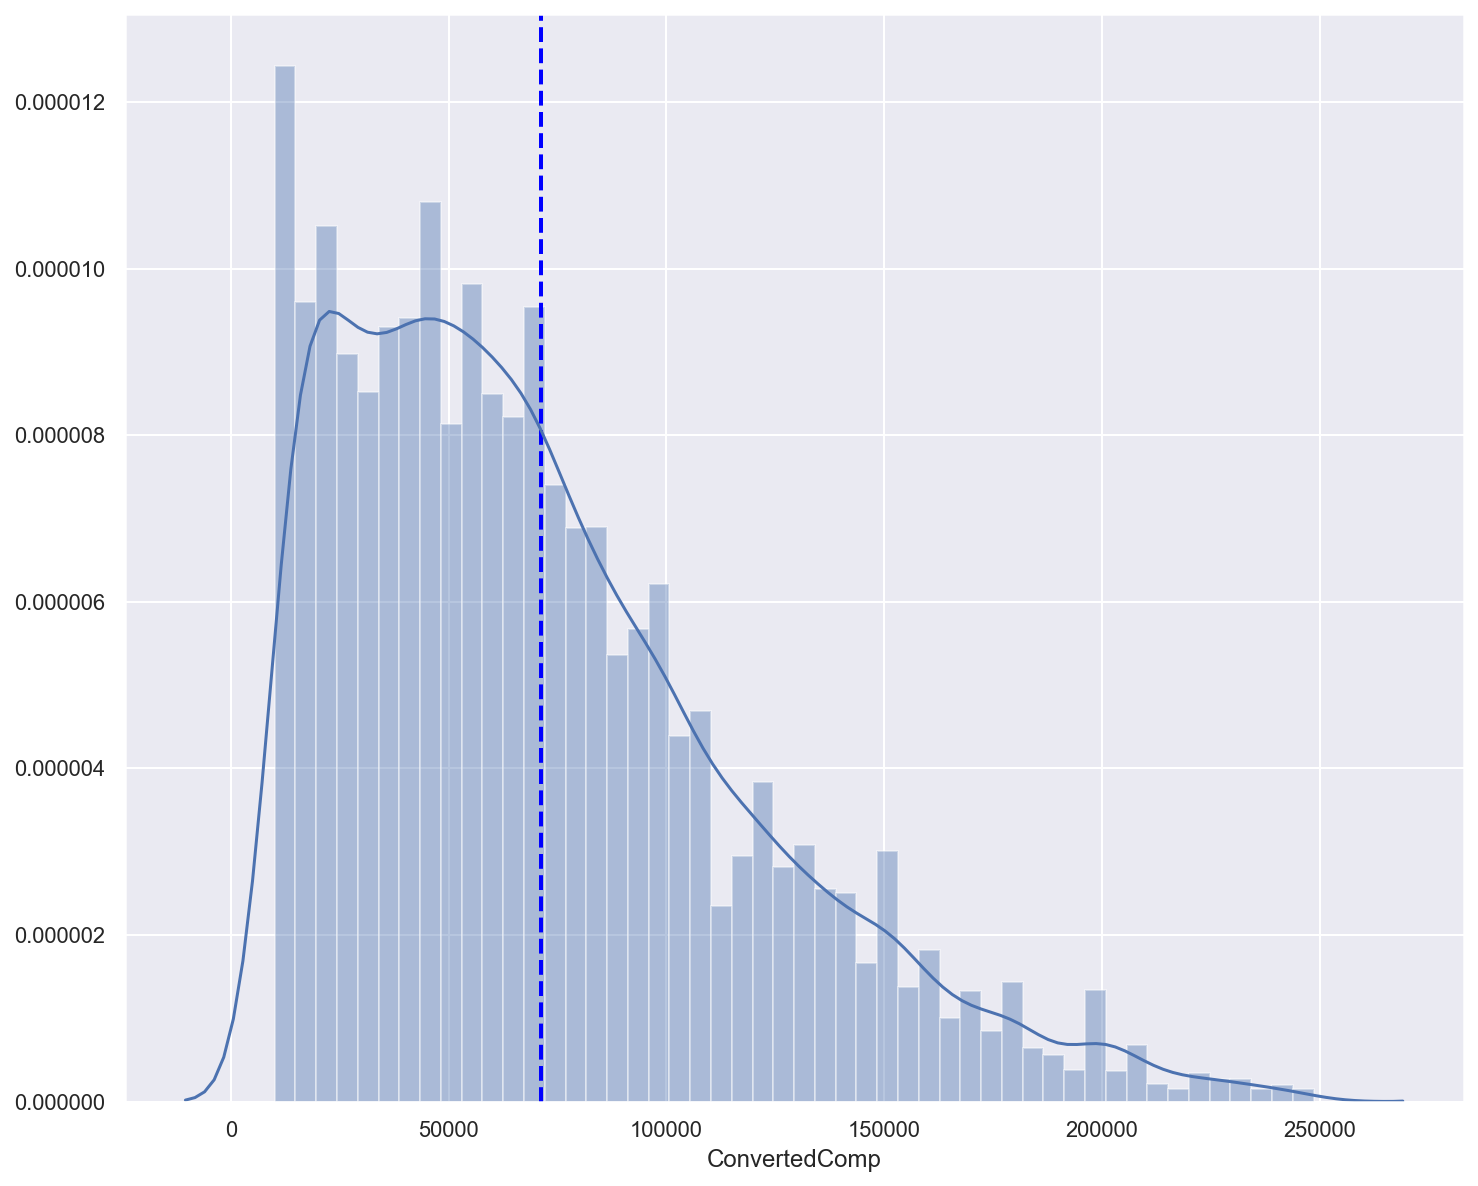

In [19]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
plt.axvline(temp['ConvertedComp'].mean(),color='blue', linestyle='--', lw=2)

sns.distplot(temp['ConvertedComp'])

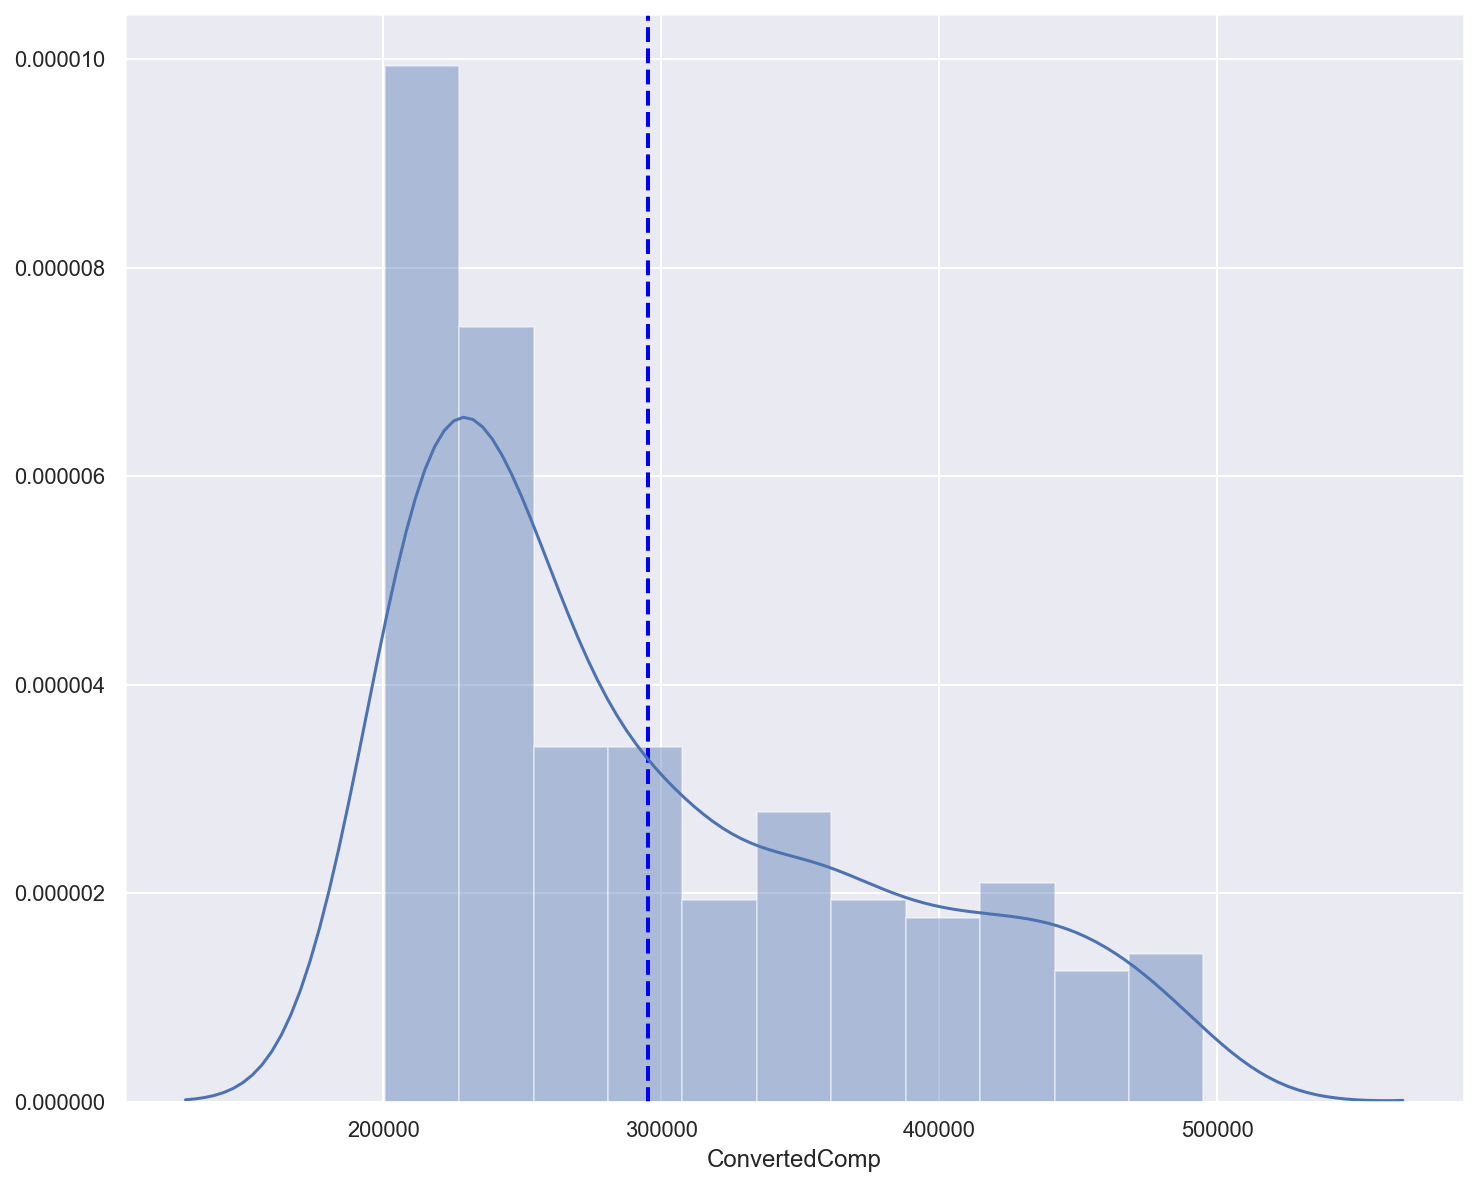

In [20]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
plt.axvline(temp2['ConvertedComp'].mean(),color='blue', linestyle='--', lw=2)

sns.distplot(temp2['ConvertedComp'])

In [7]:
X = df.drop(columns=['Respondent','ConvertedComp'])
Y = df['ConvertedComp']

sm_performance,sm_variables,sm_outcomes = sm_OLS(X,Y)
#sm_performance['Value'] = sm_performance['Value'].apply(lambda x: round(x,10))

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [8]:
Xtemp = temp.drop(columns=['Respondent','ConvertedComp'])
Ytemp = temp['ConvertedComp']

temp_performance,temp_variables,temp_outcomes = sm_OLS(Xtemp,Ytemp)

In [9]:
recursive_performance,recursive_variables,recursive_outcomes = ols_recursion(Xtemp,Ytemp)

294
139
flip
155
28
flip
127
6
flip
121
3
flip
118
0
done


In [10]:
display(sm_performance.transpose(),temp_performance.transpose(),recursive_performance.transpose())

,MSE,MSE_resid,RMSE,R^2,R^2_adjusted,F-stat,AIC,BIC
Value,1.427752e+11,2.127930e+09,46129.48966,0.457783,0.45096,67.095843,507082.849175,509148.49027


,MSE,MSE_resid,RMSE,R^2,R^2_adjusted,F-stat,AIC,BIC
Value,1.004529e+11,7.988160e+08,28263.333964,0.634374,0.629329,125.752237,434101.460873,436090.390822


,MSE,MSE_resid,RMSE,R^2,R^2_adjusted,F-stat,AIC,BIC
Value,2.186926e+11,8.071898e+08,28411.085172,0.627761,0.625444,270.930785,434158.71727,435067.047483


In [11]:
recursive_outcomes

,Observed_values,Predicted_values,Residuals
13,57060.0,60212.577146,-3152.577146
16,65277.0,59547.827863,5729.172137
18,31140.0,33398.268288,-2258.268288
22,69000.0,103947.637147,-34947.637147
28,100000.0,131881.343380,-31881.343380
...,...,...,...
88296,13272.0,14073.793892,-801.793892
88298,120000.0,110341.602783,9658.397217
88301,110000.0,86348.572452,23651.427548
88323,180000.0,121189.821219,58810.178781


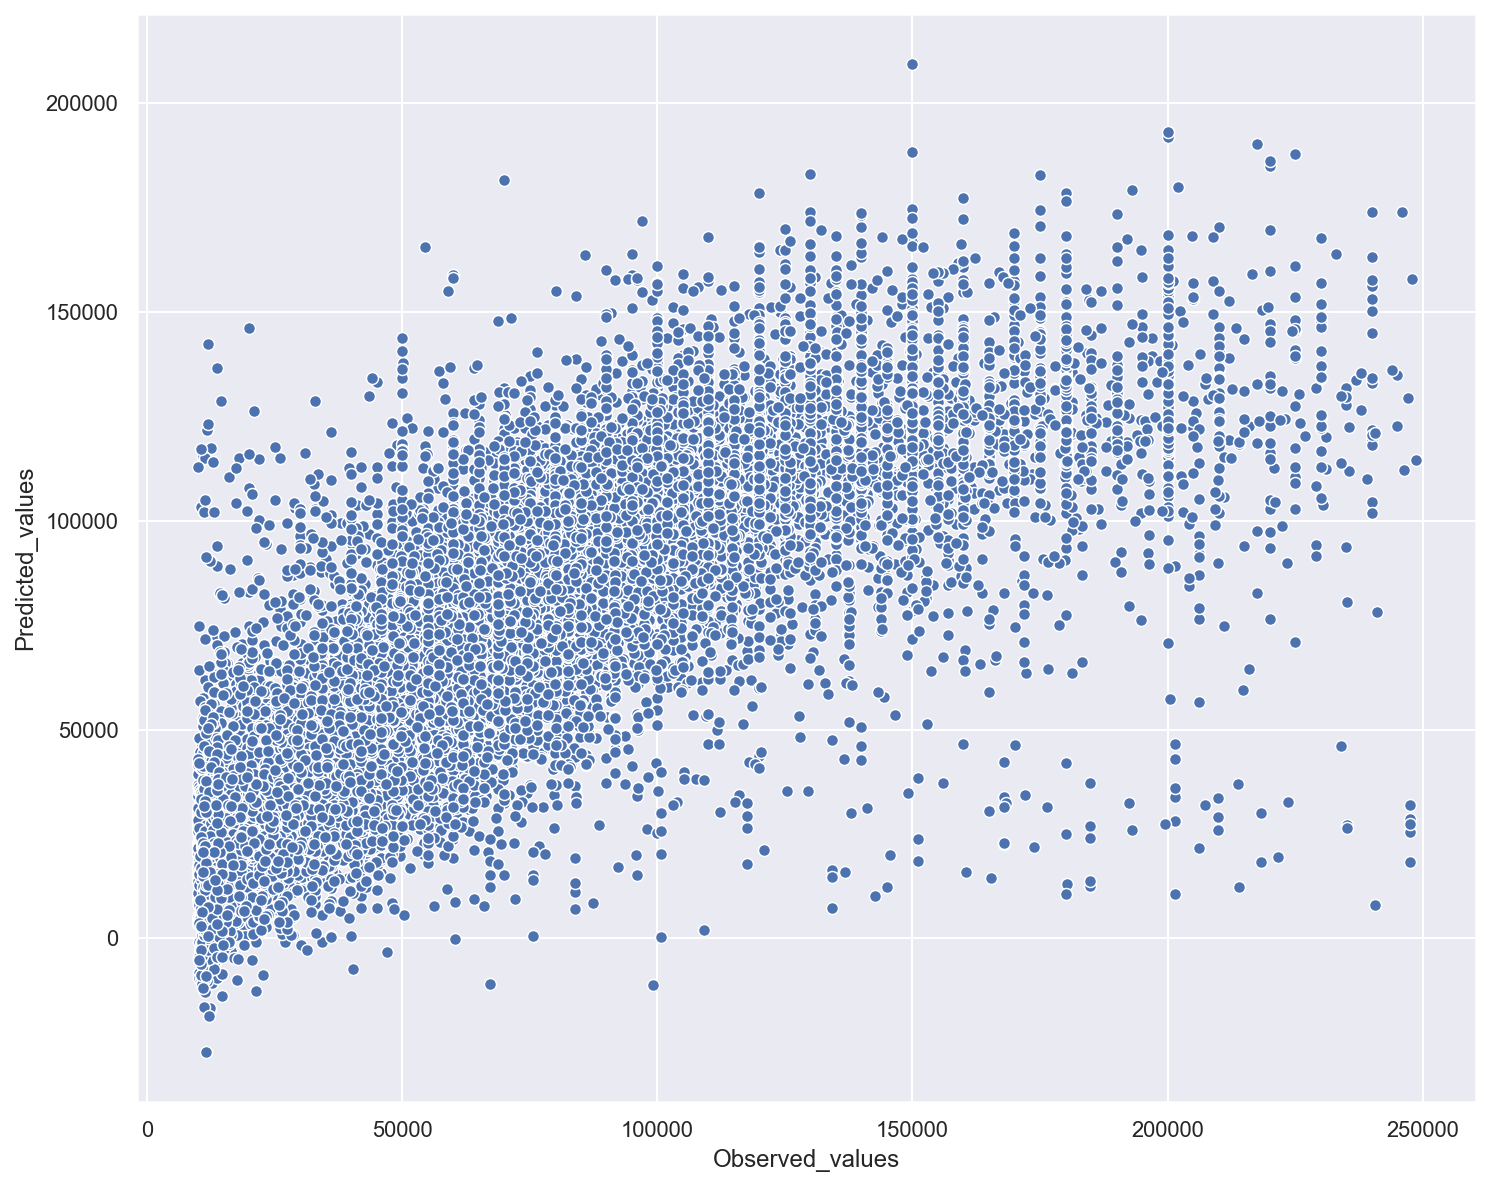

In [22]:
sns.scatterplot(x=recursive_outcomes['Observed_values'],y=recursive_outcomes['Predicted_values'])

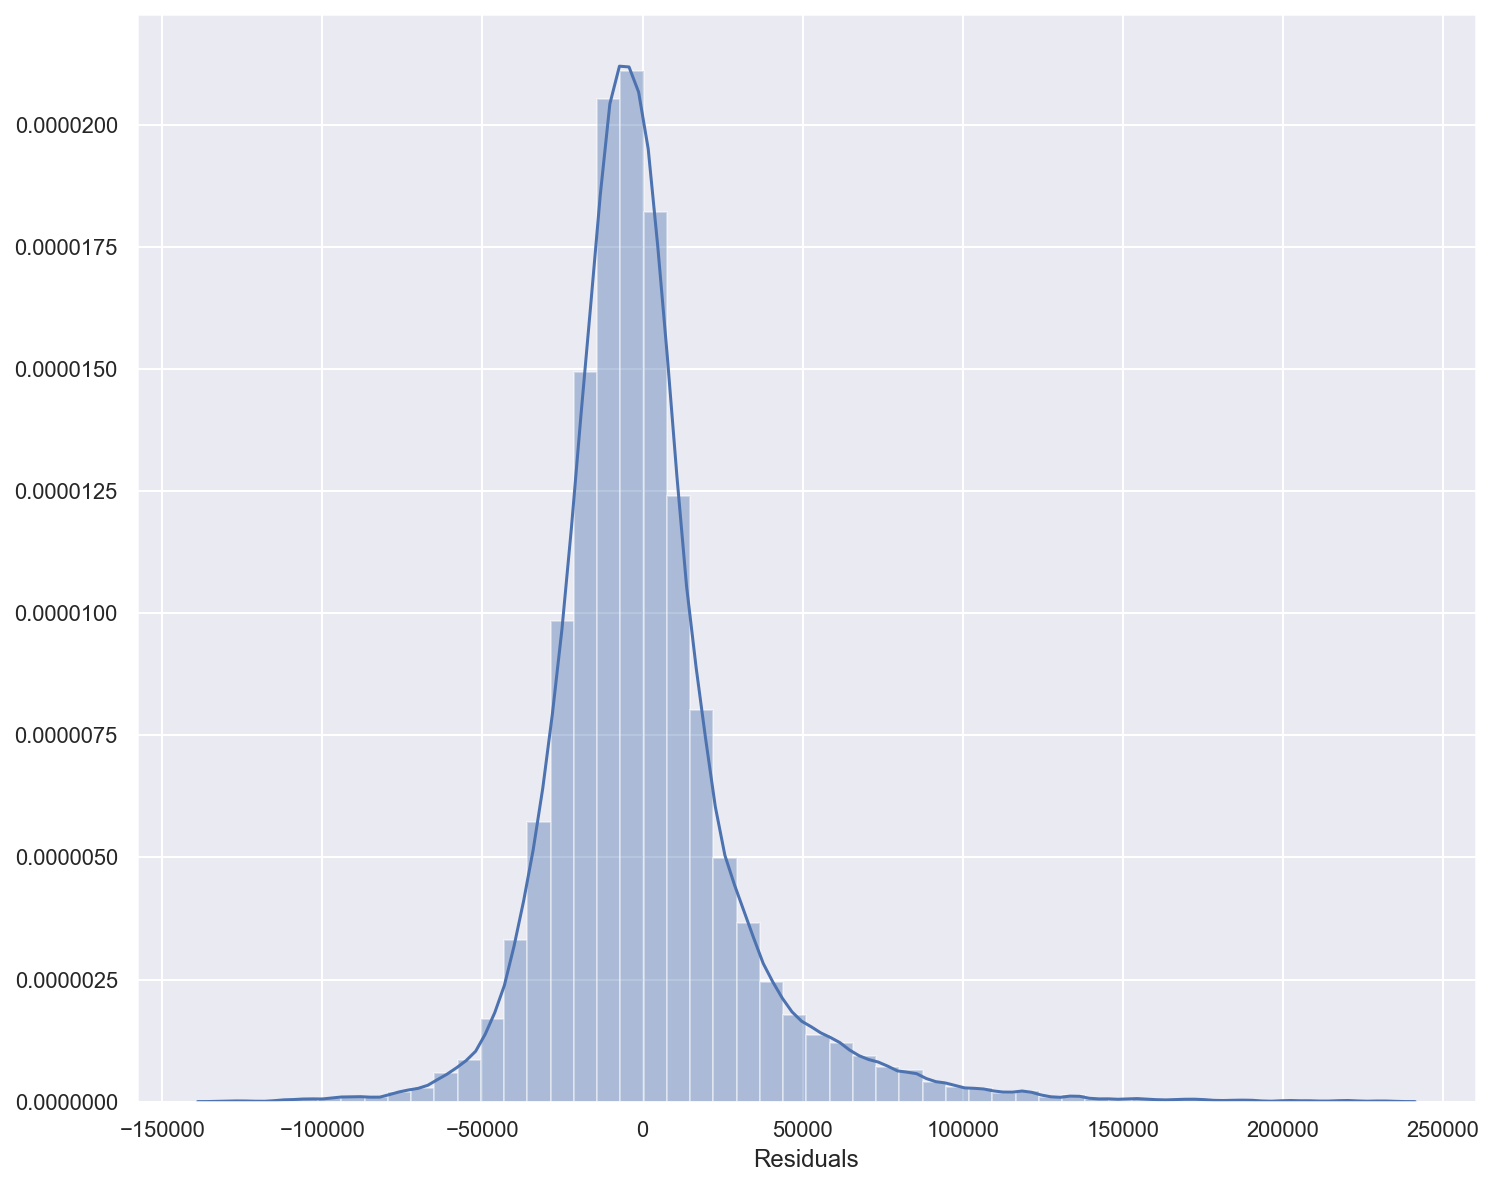

In [12]:
sns.distplot(recursive_outcomes['Residuals'])

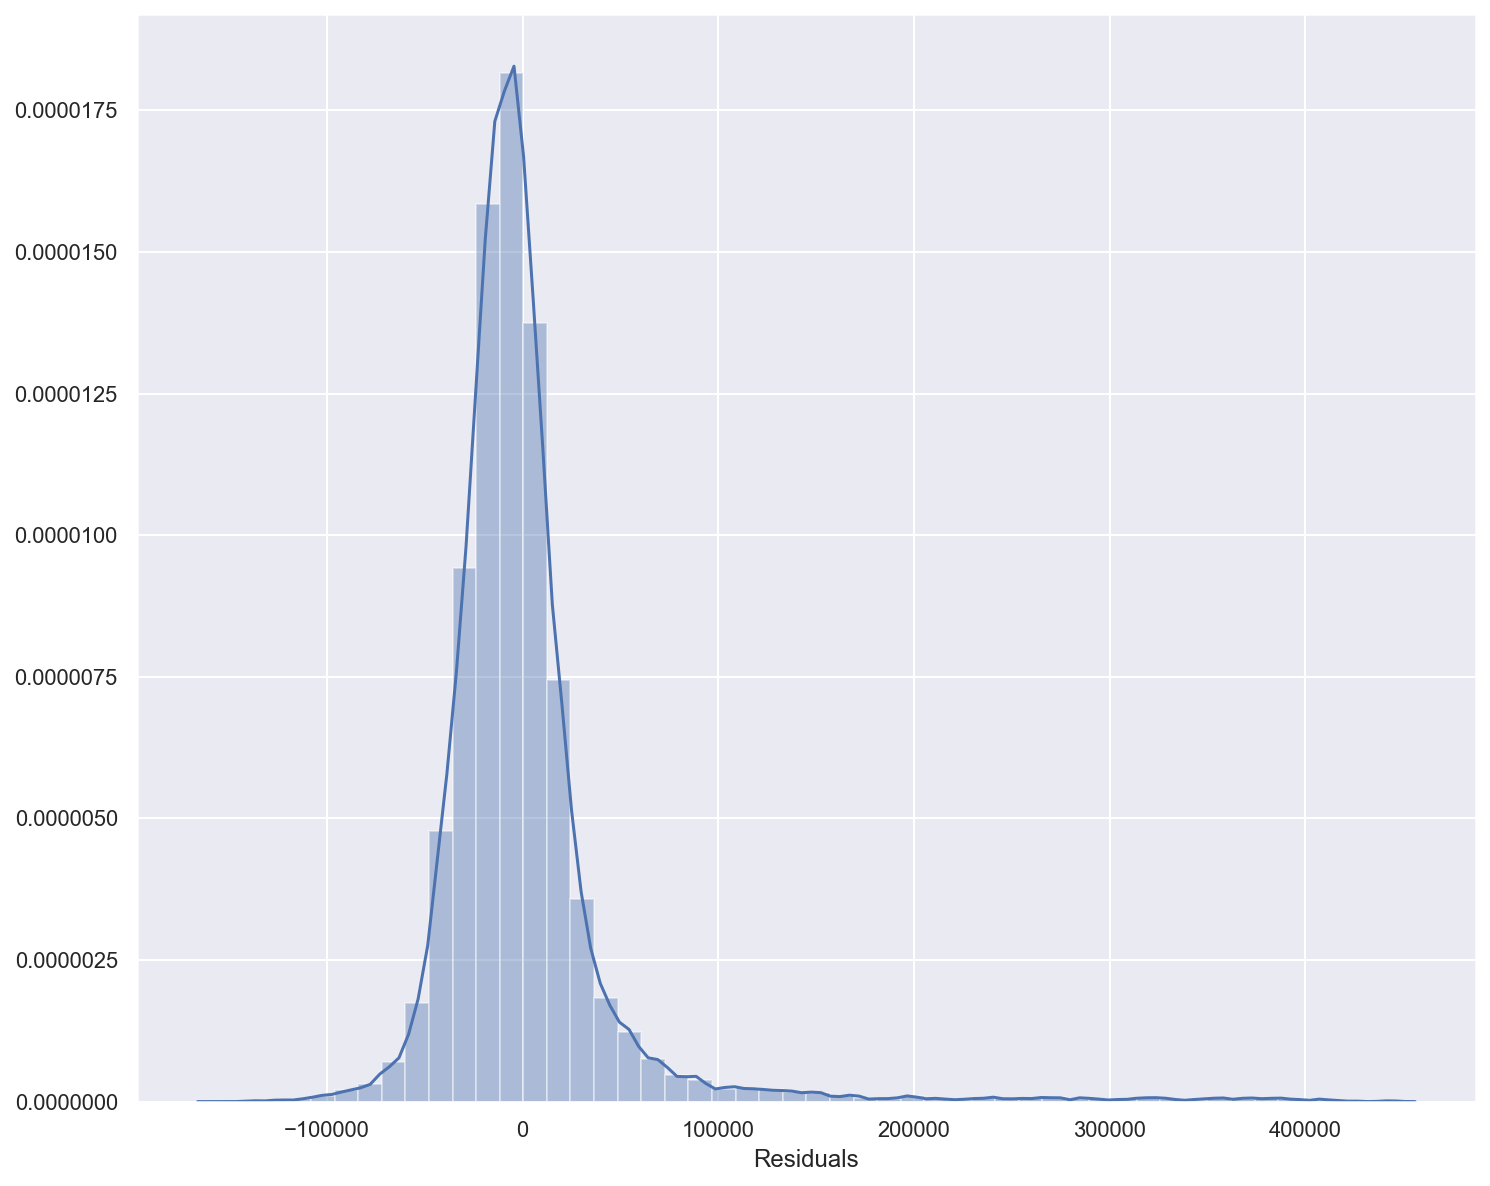

In [15]:
sns.distplot(sm_outcomes['Residuals'])